# AL Results Visualization

In this notebook, the goal is to visualize the results and compare the performance of the individual strategies with the respective model classes.

# Setup

In [1]:
# define the paths

import sys

basepath = "../"  # Project directory
sys.path.append(basepath)

# AL Scripts
AL_SCRIPTS_PATH = basepath + "al_lib/"

sys.path.append({AL_SCRIPTS_PATH})

from al_lib.active_learning_setting import ActiveLearningPaths

PATHS = ActiveLearningPaths()
(DATA_PATH, FIGURE_PATH, ENV_PATH, RESULTS_PATH, LOG_DIR) = PATHS
# sys.path.extend(PATHS)

sys.path

['/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python312.zip',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/lib-dynload',
 '',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages',
 '../',
 {'../al_lib/'},
 '../',
 '../data/',
 '../04_Active_Learning/results/',
 '../04_Active_Learning/results/figures/',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib']

## Include a logger

In [2]:
# import the logging specifications from file 'logging_config.py'
from al_lib.logging_config import create_logger
import datetime

# Add data/time information
date = datetime.datetime.now().strftime("%Y-%m-%d")
# date = now.strftime("%Y-%m-%d")
log_file_name = f"{date}_vis_al.log"
log_file_path = f"{LOG_DIR}{log_file_name}"

# Create logger
logging = create_logger(__name__, log_file_path = log_file_path)
# Usage of the logger as follows:
logging.info("Logging started")
logging.info(f"log stored at: {log_file_path}")

2024-07-01 13:57:40 - INFO - Logging started
2024-07-01 13:57:40 - INFO - log stored at: ../04_Active_Learning/logs/2024-07-01_vis_al.log


# Imports
## Packages

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge as KRR
import pandas as pd

# Import results table

In [19]:
data_krr.columns[2].replace('sklearn.kernel_ridge.KernelRidge\'>', 'KRR')

"rmse_val_'KRR_random_0"

In [32]:
# define the path to the data
TABLES_PATH = RESULTS_PATH + "al_result_tables/"

# load the data
filename_krr = "al_results_KernelRidge_backup.csv"

def load_data(filename):
    data = pd.read_csv(TABLES_PATH + filename)
    return data

data_krr = load_data(filename_krr)

# rename the columns for better readability
for col in data_krr.columns:
    # rename the columns
    data_krr.rename(columns={col: col.replace('\'sklearn.kernel_ridge.KernelRidge\'>', 'KRR')}, inplace=True)

data_krr.drop(columns=['Unnamed: 0'], inplace=True)
data_krr.head()

,rmse_test_KRR_random_0,rmse_val_KRR_random_0,sample_sel_KRR_random_0,rmse_full_KRR_random_0,rmse_test_KRR_gsx_0,rmse_val_KRR_gsx_0,sample_sel_KRR_gsx_0,rmse_full_KRR_gsx_0,rmse_test_KRR_gsy_0,rmse_val_KRR_gsy_0,...,sample_sel_KRR_gsx_4,rmse_full_KRR_gsx_4,rmse_test_KRR_gsy_4,rmse_val_KRR_gsy_4,sample_sel_KRR_gsy_4,rmse_full_KRR_gsy_4,rmse_test_KRR_uncertainty_4,rmse_val_KRR_uncertainty_4,sample_sel_KRR_uncertainty_4,rmse_full_KRR_uncertainty_4
0,243.669178,224.330211,653.0,85.951596,247.238322,226.185697,771.0,85.951596,246.376369,242.347954,...,771.0,85.951596,228.010086,234.818031,1120.0,85.951596,256.077774,251.196911,1090.0,85.951596
1,242.705415,223.486579,1153.0,85.951596,237.384730,218.773492,787.0,85.951596,178.326435,193.377036,...,787.0,85.951596,171.171256,181.458993,733.0,85.951596,242.524065,234.670171,787.0,85.951596
2,211.347369,206.297178,181.0,85.951596,203.014741,189.493508,789.0,85.951596,177.545993,194.982244,...,1191.0,85.951596,177.433011,189.896133,676.0,85.951596,248.310748,233.945605,1199.0,85.951596
3,189.941632,198.760299,445.0,85.951596,171.696947,181.995208,838.0,85.951596,166.018067,198.890590,...,789.0,85.951596,183.168607,190.504936,132.0,85.951596,227.727461,218.054709,1240.0,85.951596
4,184.854399,194.554609,995.0,85.951596,168.485111,178.951289,1191.0,85.951596,164.239759,197.981097,...,696.0,85.951596,182.007715,187.550010,774.0,85.951596,217.570958,210.387902,653.0,85.951596


In [27]:
from al_lib.selection_criteria import _random_selection, _gsx_selection, _gsy_selection, _uncertainty_selection

selection_criteria = [
    {'criteria':_random_selection, 'crit_name': 'random', 'kwargs': {}}, #'random_state': random_state}}, 
    {'criteria':_gsx_selection, 'crit_name': 'gsx', 'kwargs': {}}, 
    {'criteria':_gsy_selection, 'crit_name': 'gsy', 'kwargs': {}}, 
    {'criteria':_uncertainty_selection,'crit_name': 'uncertainty', 'kwargs': {'n_fold': 3}},
                      ]

In [28]:
# Import the sklearn models
from sklearn.kernel_ridge import KernelRidge as KRR

models = [KRR]

In [45]:
def _seperate_results(results, model = None, model_name = None,): 

    results_random = pd.DataFrame()
    results_gsx = pd.DataFrame()
    results_gsy = pd.DataFrame()
    results_uncertainty = pd.DataFrame()
    if model_name == None:
        model_name = str(model).split(" ")[1]
    if model == None:
        model_name = model_name
    if (model_name is None) & (model is None):
        raise ValueError("Please provide the model or model_name")
    results_random = pd.concat(
        [
            results_random,
            results.filter(regex=f"rmse_test_{model_name}_random"),
        ],
        axis=1,
    )
    results_gsx = pd.concat(
        [
            results_gsx,
            results.filter(
                regex=f"rmse_test_{model_name}_gsx"
            ),
        ],
        axis=1,
    )
    results_gsy = pd.concat(
        [
            results_gsy,
            results.filter(
                regex=f"rmse_test_{model_name}_gsy"
            ),
        ],
        axis=1,
    )
    results_uncertainty = pd.concat(
        [
            results_uncertainty,
            results.filter(
                regex=f"rmse_test_{model_name}_uncertainty"
            ),
        ],
        axis=1,
    )
    
    return results_random, results_gsx, results_gsy, results_uncertainty

model_krr = models #results for krr
results_random, results_gsx, results_gsy, results_uncertainty = _seperate_results(data_krr, model_name = "KRR")

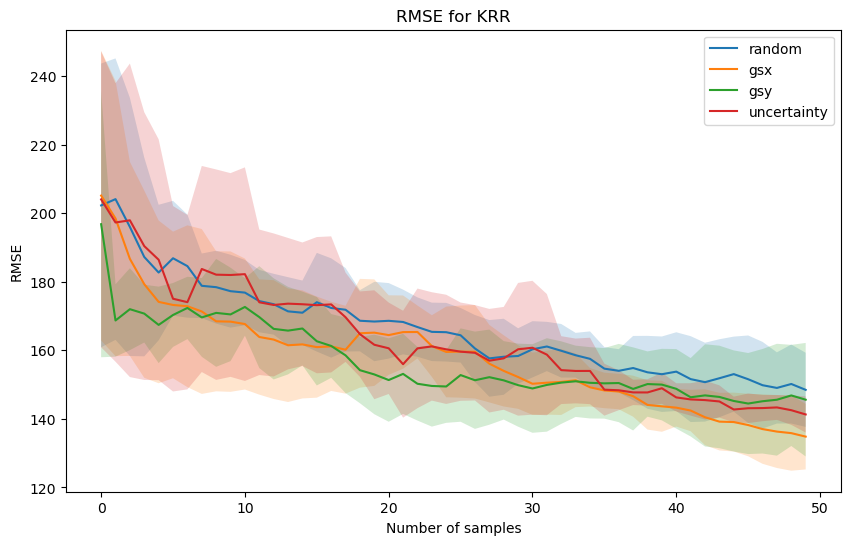

In [50]:
test_rmse = (results_random, results_gsx, results_gsy, results_uncertainty)


def _plot_rmse(test_rmse, model_name = None, model = None):
    if model_name == None:
        model_name = str(model).split(" ")[1]
    if model == None:
        model_name = model_name
    if (model_name is None) & (model is None):
        raise ValueError("Please provide the model or model_name")
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    for i, rmse in enumerate(test_rmse):
        ax.plot(rmse.mean(axis=1), label=selection_criteria[i]['crit_name'])
        # calculate the standard deviation
        std = rmse.std(axis=1)
        ax.fill_between(
            range(len(rmse)),
            rmse.mean(axis=1) - std,
            rmse.mean(axis=1) + std,
            alpha=0.2,
        )
    ax.set_title(f"RMSE for {model_name}")
    ax.set_xlabel("Number of samples")
    ax.set_ylabel("RMSE")
    ax.legend()
    plt.show()

_plot_rmse(test_rmse, model_name = "KRR")

In [57]:
# calculate the mean Area under the Curve for each sampling strategy and return the results

def _calculate_auc(test_rmse):
    aucs = []
    for i, rmse in enumerate(test_rmse):
        auc = rmse.mean(axis=1).mean()
        auc_std = rmse.mean(axis=1).std()
        print(f"AUC for {selection_criteria[i]['crit_name']} is: {auc}")
        globals()[f"{selection_criteria[i]['crit_name']}_auc"] = auc
        globals()[f"{selection_criteria[i]['crit_name']}_auc_std"] = auc_std
        aucs.append((auc, auc_std))
    return aucs

aucs = _calculate_auc(test_rmse)

AUC for random is: 166.23492343268114
AUC for gsx is: 157.90349263007337
AUC for gsy is: 156.65135635721407
AUC for uncertainty is: 162.9247137271141


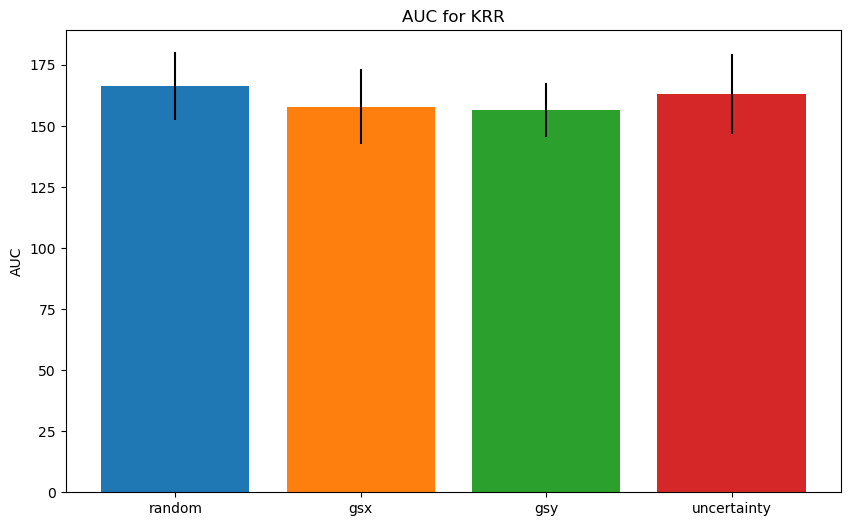

In [64]:
# plot the aucs with the standard deviation
def _plot_auc(aucs, model_name):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    for i, auc in enumerate(aucs):
        ax.bar(selection_criteria[i]['crit_name'], auc[0], yerr=auc[1], label=selection_criteria[i]['crit_name'])
    ax.set_title(f"AUC for {model_name}")
    ax.set_ylabel("AUC")

    plt.show()
_plot_auc(aucs, model_name = "KRR")